## Установка PySpark

In [1]:
!apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,278 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [49.8 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
#www-us.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

^C


In [ ]:
!tar -xvf spark-3.5.0-bin-hadoop3.tgz

spark-3.5.0-bin-hadoop3/
spark-3.5.0-bin-hadoop3/kubernetes/
spark-3.5.0-bin-hadoop3/kubernetes/tests/
spark-3.5.0-bin-hadoop3/kubernetes/tests/pyfiles.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/decommissioning.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/autoscale.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/python_executable_check.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/worker_memory_check.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/py_container_checks.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/decommissioning_cleanup.py
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/decom.sh
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/R/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/python/
spark-3.5.0-bin-hadoop3/kubern

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

## Работа с RDD

In [ ]:
words = sc.parallelize (
   ["scala",
   "java",
   "hadoop",
   "spark",
   "akka",
   "spark",
   "hadoop",
   "pyspark",
   "bigdata",
    "python"]
)

In [ ]:
words

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:289

In [ ]:
words.count()

10

In [ ]:
def mapper(w):
  return (w, 1)

In [ ]:
words.map(mapper)

PythonRDD[2] at RDD at PythonRDD.scala:53

In [ ]:
transform = words.map(mapper)

In [ ]:
transform.collect()

[('scala', 1),
 ('java', 1),
 ('hadoop', 1),
 ('spark', 1),
 ('akka', 1),
 ('spark', 1),
 ('hadoop', 1),
 ('pyspark', 1),
 ('bigdata', 1),
 ('python', 1)]

In [ ]:
def reducer(a, b):
  return a + b

In [ ]:
transform.reduceByKey(reducer)

PythonRDD[8] at RDD at PythonRDD.scala:53

In [ ]:
transform = transform.reduceByKey(reducer)

In [ ]:
transform.collect()

[('scala', 1),
 ('java', 1),
 ('hadoop', 2),
 ('akka', 1),
 ('bigdata', 1),
 ('python', 1),
 ('spark', 2),
 ('pyspark', 1)]

## DataFrame

In [ ]:
df = spark.read.csv('power.csv', inferSchema=True, header=True)

In [ ]:
## Обзор

In [ ]:
df.count()

555992

In [ ]:
df.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('quantity', 'double'),
 ('category', 'int')]

In [ ]:
df.take(2)

[Row(country='Austria', year=1996, quantity=5.0, category=1),
 Row(country='Austria', year=1995, quantity=17.0, category=1)]

## Практика 1. Загрузите данные из файла transactions.csv. Выведите 10 первых строчек

In [ ]:
df_practice = spark.read.csv('transactions.csv', inferSchema=True, header=True)

In [ ]:
df_practice.take(10)

[Row(Year=2017, Month=1, ID='t001', Product='A1', Amount=7, Price=2904, Total=20328, Cost=1200),
 Row(Year=2017, Month=1, ID='t002', Product='A2', Amount=2, Price=1896, Total=3792, Cost=1100),
 Row(Year=2017, Month=2, ID='t003', Product='A1', Amount=5, Price=2904, Total=14520, Cost=1200),
 Row(Year=2017, Month=2, ID='t004', Product='A4', Amount=1, Price=8618, Total=8618, Cost=4200),
 Row(Year=2017, Month=2, ID='t005', Product='A5', Amount=3, Price=5175, Total=15525, Cost=500),
 Row(Year=2017, Month=2, ID='t006', Product='_6', Amount=4, Price=3500, Total=14000, Cost=200),
 Row(Year=2017, Month=3, ID='t007', Product='_3', Amount=6, Price=1265, Total=7590, Cost=200),
 Row(Year=2017, Month=3, ID='t008', Product='_5', Amount=2, Price=5175, Total=10350, Cost=1200),
 Row(Year=2017, Month=4, ID='t009', Product='_8', Amount=3, Price=3760, Total=11280, Cost=1000),
 Row(Year=2017, Month=4, ID='t010', Product='_4', Amount=2, Price=8618, Total=17236, Cost=3400)]

In [ ]:
# Выборки

In [ ]:
df_lim = df.select('country', 'year', 'quantity')
df_lim.take(1)

[Row(country='Austria', year=1996, quantity=5.0)]

In [ ]:
df_lim = df_lim.withColumnRenamed('year', 'y')
df_lim

DataFrame[country: string, y: int, quantity: double]

In [ ]:
df_lim.columns

['country', 'y', 'quantity']

In [ ]:
## Описание и статистики

In [ ]:
df_lim.show()

+-------+----+--------+
|country|   y|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
|Austria|1995|    17.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|    35.0|
|Belgium|2011|    25.0|
|Belgium|2010|    22.0|
|Belgium|2009|    45.0|
|Czechia|1998|     1.0|
|Czechia|1995|     7.0|
|Finland|2010|     9.0|
|Finland|2009|    13.0|
|Finland|2008|    39.0|
|Finland|2007|    21.0|
|Finland|2006|     0.0|
|Finland|2005|     0.0|
|Finland|2004|     0.0|
|Finland|2003|     0.0|
|Finland|2002|     0.0|
|Finland|2001|     0.0|
+-------+----+--------+
only showing top 20 rows



In [ ]:
df_lim.describe().show()

+-------+-----------+------------------+--------------------+
|summary|    country|                 y|            quantity|
+-------+-----------+------------------+--------------------+
|  count|     555992|            555992|              555992|
|   mean|       NULL|2002.7879357976374|  219736.32443985113|
| stddev|       NULL| 7.190843464727523|2.0783714150742948E7|
|    min|Afghanistan|              1990|            -69989.0|
|    max|   Zimbabwe|              2014|          6.680329E9|
+-------+-----------+------------------+--------------------+



In [ ]:
## Сохранение

In [ ]:
df_lim.write.format('com.databricks.spark.csv').option('header', 'true').save('df_lim.csv')

In [ ]:
## Вычисления

In [ ]:
df_lim = df_lim.withColumn('quantity x 2', df_lim['quantity'] * 2)

In [ ]:
df_grp = df_lim.groupBy('country')

In [ ]:
df_sum = df_grp.sum('quantity', 'quantity x 2')

In [ ]:
df_sum.show()

+------------------+--------------------+--------------------+
|           country|       sum(quantity)|   sum(quantity x 2)|
+------------------+--------------------+--------------------+
|     Côte d'Ivoire|   5250615.316676497|1.0501230633352995E7|
|              Chad|   3764650.749131999|   7529301.498263998|
|          Paraguay|  2690450.6119999965|   5380901.223999993|
|          Anguilla|   5936.899999999976|  11873.799999999952|
|             Yemen|1.2925375103902148E7|2.5850750207804296E7|
|State of Palestine|    546512.712344632|   1093025.424689264|
|           Senegal|  1196515.5155737335|   2393031.031147467|
|            Sweden|  7.11881905993339E7| 1.423763811986678E8|
|        Cabo Verde|  38977.374800000005|   77954.74960000001|
|          Kiribati|   1907.466229000001|   3814.932458000002|
|            Guyana|   599086.9545018867|  1198173.9090037735|
|       Philippines|2.4900846261245254E7| 4.980169252249051E7|
|           Eritrea|   699711.1476713059|  1399422.2953

In [ ]:
## Свободные таблицы

In [ ]:
df_lim.groupby('country').pivot('y').sum('quantity').show()

+------------------+--------------------+------------------+------------------+--------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+
|           country|                1990|              1991|              1992|                1993|              1994|              1995|              1996|               1997|              1998|              1999|              2000|              2001|              2002|              2003|              2004|              2005|              2006|              2007|              2008|              2009|              2010|              2011|              2012|              2013|               20

## Практика 2. Выведите максимальную и минимальную (2 датафрейма) количество (Amount) по продукту

In [ ]:
df_pr_max = df_practice.groupby('Product').max('Amount')
df_pr_max.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [ ]:
df_pr_min = df_practice.groupby('Product').min('Amount')
df_pr_min.show()

+-------+-----------+
|Product|min(Amount)|
+-------+-----------+
|     _5|          1|
|     _2|          1|
|     A2|          2|
|     _8|          1|
|     _3|          2|
|     _4|          1|
|     _6|          4|
|     A4|          1|
|     A5|          2|
|     A1|          2|
+-------+-----------+



In [ ]:
## Подвыборки

In [ ]:
df['quantity'] > 184264

Column<'(quantity > 184264)'>

In [ ]:
df.where((df['quantity'] > 184264)).show()

+-------------+----+--------+--------+
|      country|year|quantity|category|
+-------------+----+--------+--------+
|United States|2014|367987.0|       2|
|United States|2013|384439.0|       2|
|United States|2012|370625.0|       2|
|United States|2011|310909.0|       2|
|United States|2010|335418.0|       2|
|United States|2009|230589.0|       2|
|United States|2008|226570.0|       2|
|United States|2007|221771.0|       2|
|United States|2005|314655.0|       2|
|United States|2004|243916.0|       2|
|United States|1996|226319.0|       2|
|United States|1995|292568.0|       2|
|United States|1994|230254.0|       2|
|United States|1993|247909.0|       2|
|United States|2014|448216.0|       2|
|United States|2013|458711.0|       2|
|United States|2012|433505.0|       2|
|United States|2011|382566.0|       2|
|United States|2010|406606.0|       2|
|United States|2009|296903.0|       2|
+-------------+----+--------+--------+
only showing top 20 rows



In [ ]:
df_filter = df.where((df['quantity'] > 184264) & (df['country'] != 'United States'))
df_filter.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
| Canada|2013|191861.0|      10|
| Canada|2007|202060.0|      10|
| Canada|2006|203142.0|      10|
| Canada|2005|224001.0|      10|
| Canada|2004|236803.0|      10|
| Canada|2003|226291.0|      10|
+-------+----+--------+--------+
only showing top 20 rows



## Практика 3. Выведите список всех, товаров, которых хоть когда-то было больше 5-ти штук


In [ ]:
df_pr_max.where(df_pr_max['max(Amount)'] > 5).show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     _8|         10|
|     _3|          7|
|     A5|          7|
|     A1|          9|
+-------+-----------+



## SQL

In [ ]:
df.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
|Belgium|2011|    25.0|       1|
|Belgium|2010|    22.0|       1|
|Belgium|2009|    45.0|       1|
|Czechia|1998|     1.0|       1|
|Czechia|1995|     7.0|       1|
|Finland|2010|     9.0|       1|
|Finland|2009|    13.0|       1|
|Finland|2008|    39.0|       1|
|Finland|2007|    21.0|       1|
|Finland|2006|     0.0|       1|
|Finland|2005|     0.0|       1|
|Finland|2004|     0.0|       1|
|Finland|2003|     0.0|       1|
|Finland|2002|     0.0|       1|
|Finland|2001|     0.0|       1|
+-------+----+--------+--------+
only showing top 20 rows



In [ ]:
df.createOrReplaceTempView('power')

In [ ]:
spark.sql('SELECT * FROM power').show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
|Belgium|2011|    25.0|       1|
|Belgium|2010|    22.0|       1|
|Belgium|2009|    45.0|       1|
|Czechia|1998|     1.0|       1|
|Czechia|1995|     7.0|       1|
|Finland|2010|     9.0|       1|
|Finland|2009|    13.0|       1|
|Finland|2008|    39.0|       1|
|Finland|2007|    21.0|       1|
|Finland|2006|     0.0|       1|
|Finland|2005|     0.0|       1|
|Finland|2004|     0.0|       1|
|Finland|2003|     0.0|       1|
|Finland|2002|     0.0|       1|
|Finland|2001|     0.0|       1|
+-------+----+--------+--------+
only showing top 20 rows



In [ ]:
spark.sql('SELECT country, sum(quantity) FROM power GROUP BY country').show()

+------------------+--------------------+
|           country|       sum(quantity)|
+------------------+--------------------+
|     Côte d'Ivoire|   5250615.316676497|
|              Chad|   3764650.749131999|
|          Paraguay|  2690450.6119999965|
|          Anguilla|   5936.899999999976|
|             Yemen|1.2925375103902148E7|
|State of Palestine|    546512.712344632|
|           Senegal|  1196515.5155737335|
|            Sweden|  7.11881905993339E7|
|        Cabo Verde|  38977.374800000005|
|          Kiribati|   1907.466229000001|
|            Guyana|   599086.9545018867|
|       Philippines|2.4900846261245254E7|
|           Eritrea|   699711.1476713059|
|            Jersey|  22449.031268623025|
|             Tonga|   4449.470516472934|
|          Djibouti|           61539.518|
|         Singapore|1.1670989930418296E7|
|          Malaysia|3.0402219509000026E7|
|              Fiji|  226237.58985361055|
|            Turkey|1.6896857646963182E8|
+------------------+--------------

In [ ]:
## Соединение
from pyspark.sql import Row

In [ ]:
row1 = Row("name", "pet", "count")
row2 = Row("name", "pet2", "count2")

In [ ]:
df1 = sc.parallelize([
    row1("Sue", "cat", 16),
    row1("Kim", "dog", 1),
    row1("Bob", "fish", 5),
    row1("Libuse", "horse", 1)
    ]).toDF()

df2 = sc.parallelize([
    row2("Sue", "eagle", 2),
    row2("Kim", "ant", 179),
    row2("Bob", "lizard", 5),
    row2("Ferdinand", "bees", 23)
    ]).toDF()

In [ ]:
df1.show()

+------+-----+-----+
|  name|  pet|count|
+------+-----+-----+
|   Sue|  cat|   16|
|   Kim|  dog|    1|
|   Bob| fish|    5|
|Libuse|horse|    1|
+------+-----+-----+



In [ ]:
df2.show()

+---------+------+------+
|     name|  pet2|count2|
+---------+------+------+
|      Sue| eagle|     2|
|      Kim|   ant|   179|
|      Bob|lizard|     5|
|Ferdinand|  bees|    23|
+---------+------+------+



In [ ]:
df1.join(df2, 'name', how='inner').show()

+----+----+-----+------+------+
|name| pet|count|  pet2|count2|
+----+----+-----+------+------+
| Bob|fish|    5|lizard|     5|
| Kim| dog|    1|   ant|   179|
| Sue| cat|   16| eagle|     2|
+----+----+-----+------+------+



## Практика 4. При помощи операции соединения выведите максимальное, минимальное и среднее (avg) количество (Amount) по продукту

In [ ]:
df_pr_avg = df_practice.groupby('Product').avg('Amount')
df_pr_avg.show()

+-------+------------------+
|Product|       avg(Amount)|
+-------+------------------+
|     _5|3.5454545454545454|
|     _2|              4.75|
|     A2|               2.0|
|     _8|               3.5|
|     _3| 4.285714285714286|
|     _4|               2.0|
|     _6|               4.0|
|     A4|               2.0|
|     A5|               4.0|
|     A1|               5.6|
+-------+------------------+



In [ ]:
df_pr_max.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [ ]:
df_pr_avg.join(df_pr_max, 'Product', how='inner').join(df_pr_min, 'Product', how='inner').show()

+-------+------------------+-----------+-----------+
|Product|       avg(Amount)|max(Amount)|min(Amount)|
+-------+------------------+-----------+-----------+
|     _5|3.5454545454545454|          6|          1|
|     _2|              4.75|          8|          1|
|     A2|               2.0|          2|          2|
|     _8|               3.5|         10|          1|
|     _3| 4.285714285714286|          7|          2|
|     _4|               2.0|          3|          1|
|     _6|               4.0|          4|          4|
|     A4|               2.0|          3|          1|
|     A5|               4.0|          7|          2|
|     A1|               5.6|          9|          2|
+-------+------------------+-----------+-----------+



## Визуализация

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
to_show = df.groupby('year').sum('quantity').orderBy('year')
to_show.show()

+----+--------------------+
|year|       sum(quantity)|
+----+--------------------+
|1990|2.087682708881744...|
|1991| 1.739412807398364E9|
|1992|1.3611081197164166E9|
|1993|1.067342326233320...|
|1994|1.4753186100196836E9|
|1995| 7.598610877614318E8|
|1996| 4.095245487292342E8|
|1997|1.568750825634121E10|
|1998|2.0952988770549102E9|
|1999| 1.094476694547396E9|
|2000| 4.018098436086365E8|
|2001| 4.041394497488131E8|
|2002|4.0867197396837527E8|
|2003| 3.724511597890258E8|
|2004| 3.829381634773043E8|
|2005| 8.242098120255317E9|
|2006| 4.107537335128143E8|
|2007|1.2549522198699698E9|
|2008| 4.423112479087204E9|
|2009| 4.246565725943925E8|
+----+--------------------+
only showing top 20 rows



In [ ]:
pd_df = to_show.toPandas()

<Axes: >

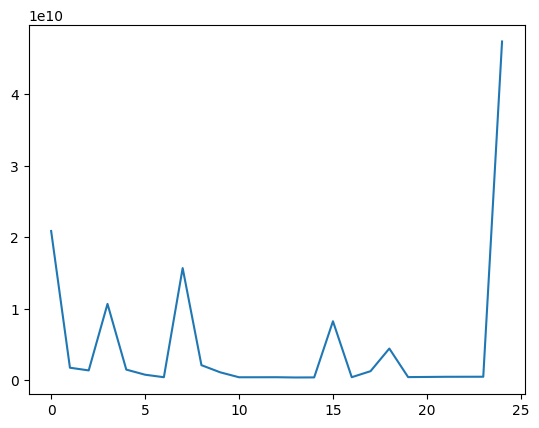

In [ ]:
pd_df['sum(quantity)'].plot()

In [ ]:
years = to_show[['year']].collect()
sums = to_show[['sum(quantity)']].collect()

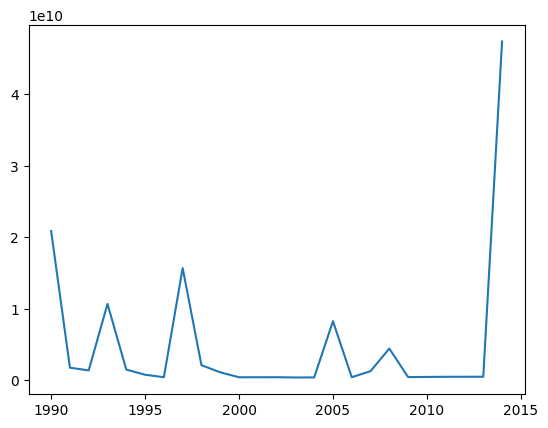

In [ ]:
plt.figure()
plt.plot(years, sums)
plt.show()

# Домашнее задание
- Скачайте dataset iris https://drive.google.com/file/d/18ksAxTxBkp15LToEg46BHhwp3sPIoeUU/view?usp=sharing
- Решите домашнее задание - https://colab.research.google.com/drive/1bFOzJNdQzITORtur_m0utqfDJ0QbGe7D?usp=sharing